In [1]:
import numpy as np

import matplotlib.pyplot as plt

import ai_prentice_wasserstein
import utils

In [2]:
pendulum_data = np.load("trajectories/pendulum.npz")
data = pendulum_data["data"]
rel_std = 0.3
data = data + np.random.normal(0, data.reshape(-1, 2).max(axis=0) * rel_std, data.shape)

In [3]:
ai_prentice = ai_prentice_wasserstein.DimensionalityPrentice()

In [4]:
ai_prentice.fit(data)

Normalizing
Computing distance matrix
Embedding data and computing scores
Computing the dimensionality


In [5]:
embedding = ai_prentice.embeddings[1]
energy = pendulum_data["params"].T[0]

In [13]:
plt.rcParams.update({'font.size': 20})

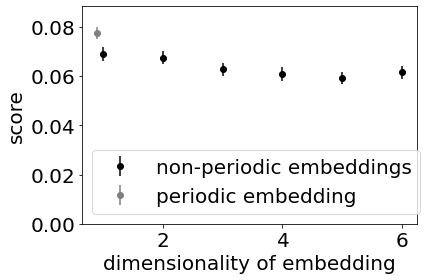

In [14]:
utils.plot_scores(plt.gca(), ai_prentice.scores, ai_prentice.errors)
# plt.savefig("n_pend_scores.pdf")
plt.show()

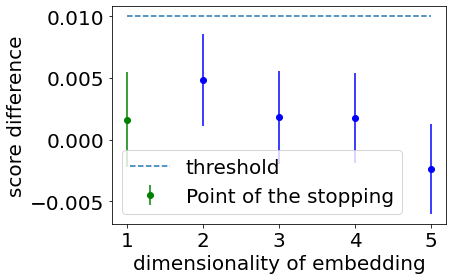

In [15]:
utils.plot_score_diffs(plt.gca(), ai_prentice.scores, ai_prentice.errors, ai_prentice.dimensionality, ai_prentice.threshold)
# plt.savefig("n_pend_diffs.pdf")
plt.show()

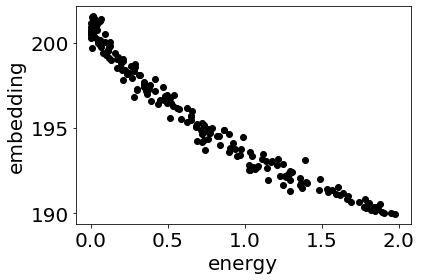

In [16]:
utils.plot_embedding_vs_conserved_quantity(plt.gca(), embedding, energy, "energy")
# plt.savefig("n_pend_energy.pdf")
plt.show()

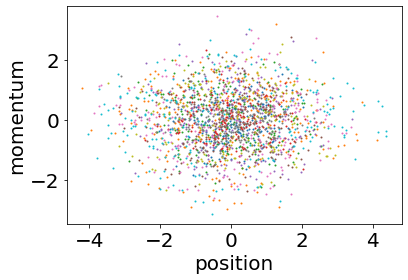

In [18]:
fig, ax = plt.subplots()
for traj in data[:10]:
    ax.scatter(*traj.T, s=1)
ax.set_xlabel("position")
ax.set_ylabel("momentum")
# plt.savefig("n_pend_data.pdf")
plt.show()

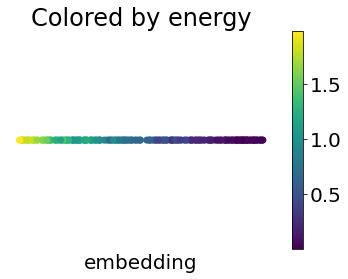

In [19]:
utils.plot_1d(plt.figure(), plt.gca(), embedding, energy, "energy")
# plt.savefig("n_pend_1d.pdf")
plt.show()